# Visualizations for both walking speed and cost analyses

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ms_data = pd.read_csv('ms_data_clean.csv')
ms_data['visit_date'] = pd.to_datetime(ms_data['visit_date'])

## 1. Walking Speed Analysis

## Scatter plot of age vs walking speed with regression line

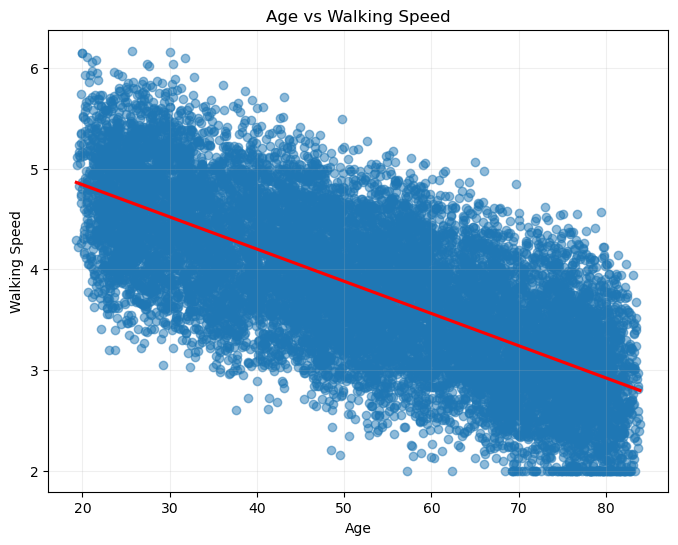

In [22]:
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='walking_speed', data=ms_data, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Age vs Walking Speed')
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.grid(alpha=0.2)
plt.show()

## Box plots by education level

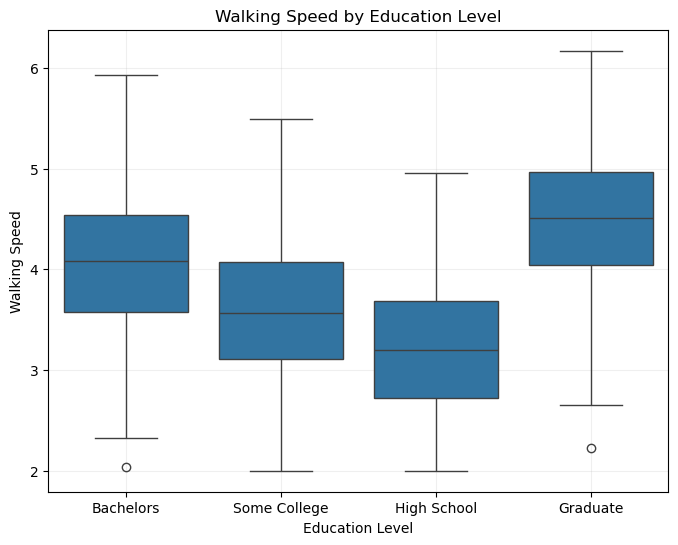

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='education_level', y='walking_speed', data=ms_data)
plt.title('Walking Speed by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Walking Speed')
plt.grid(alpha=0.2)
plt.show()

## Line plot showing education age interaction

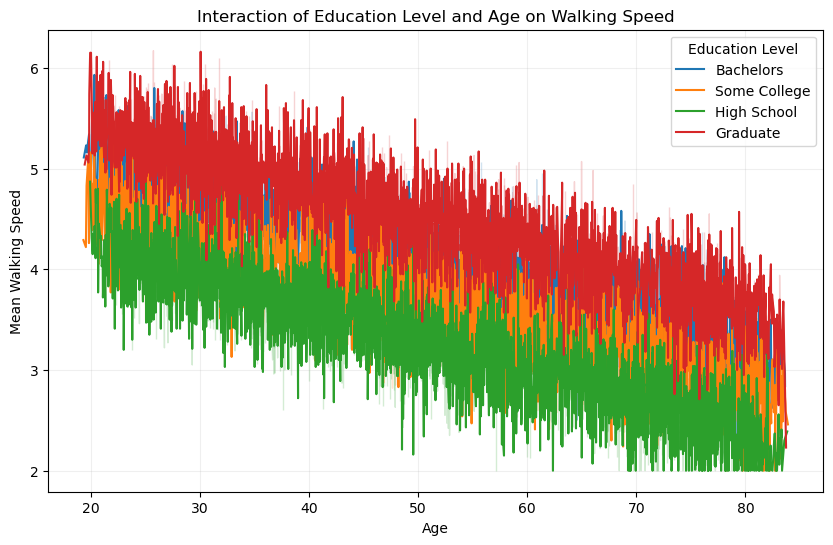

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=ms_data, x='age', y='walking_speed', hue='education_level')
plt.title('Interaction of Education Level and Age on Walking Speed')
plt.xlabel('Age')
plt.ylabel('Mean Walking Speed')
plt.grid(alpha=0.2)
plt.legend(title='Education Level')
plt.show()


## 2. Cost Analysis

### Bar plot of mean costs by insurance type

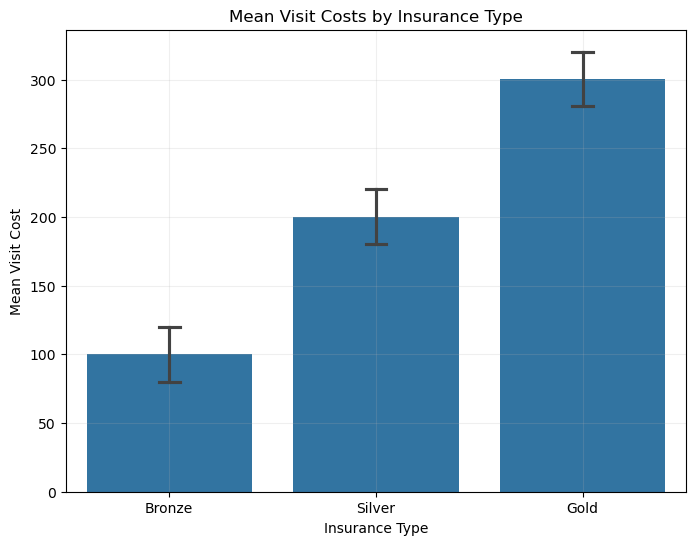

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x='insurance_type', y='visit_cost', data=ms_data, errorbar='sd', capsize=0.1)
plt.title('Mean Visit Costs by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Mean Visit Cost')
plt.grid(alpha=0.2)
plt.show()

### Box plots of cost distributions

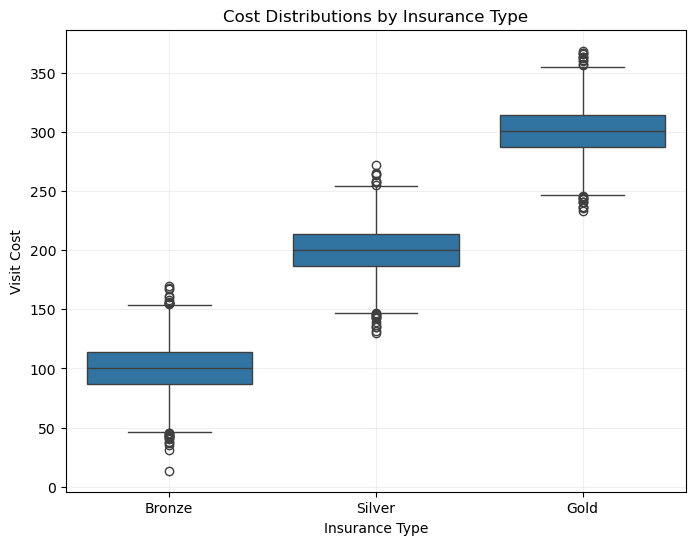

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='insurance_type', y='visit_cost', data=ms_data)
plt.title('Cost Distributions by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Visit Cost')
plt.grid(alpha=0.2)
plt.show()


## 3. Combined visualizations

### Pair plot of key variables

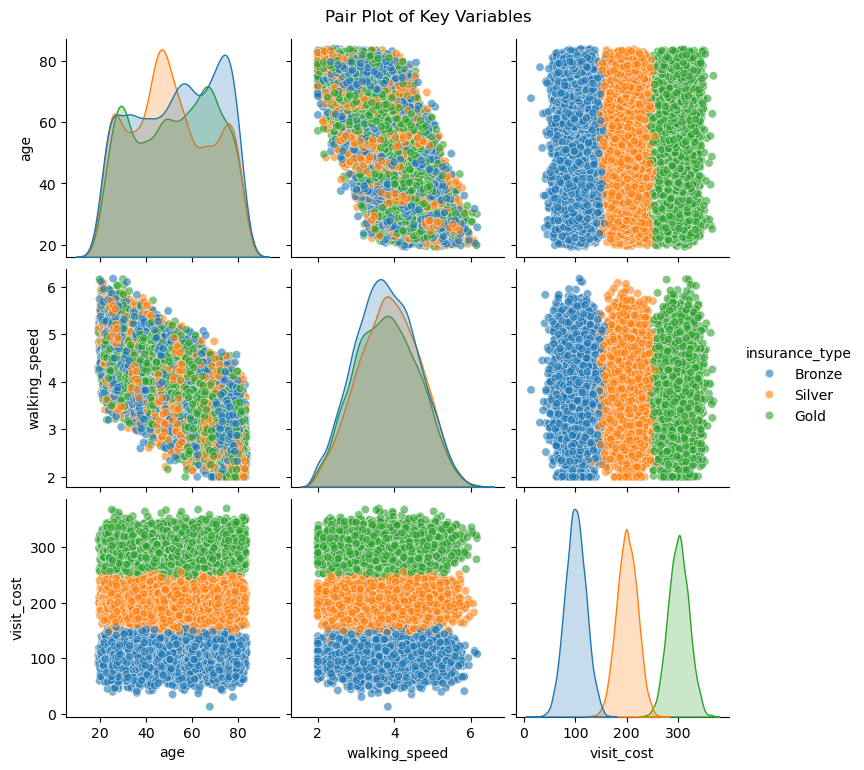

In [26]:
sns.pairplot(ms_data, hue='insurance_type', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

### Faceted plots by education/insurance

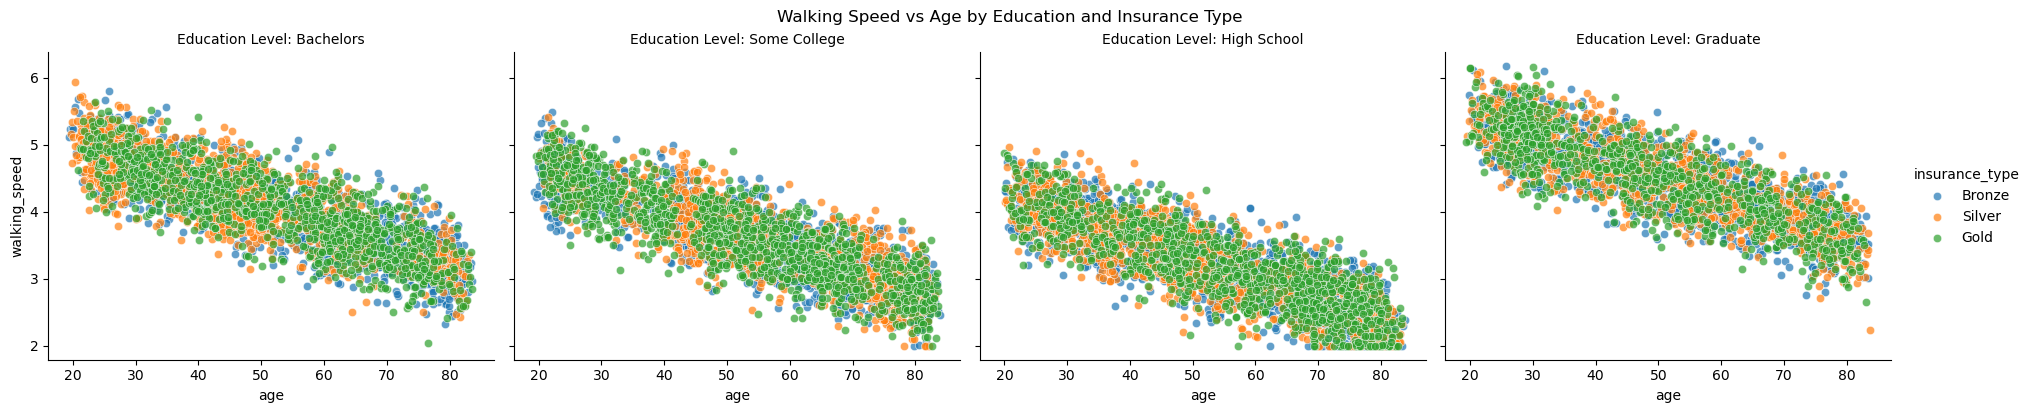

In [27]:
g = sns.FacetGrid(ms_data, col='education_level', hue='insurance_type', height=4, aspect=1.2)
g.map(sns.scatterplot, 'age', 'walking_speed', alpha=0.7)
g.add_legend()
g.set_titles("Education Level: {col_name}")
g.fig.suptitle('Walking Speed vs Age by Education and Insurance Type', y=1.02)
plt.show()


### Time trends of visit_date

<Figure size 1200x800 with 0 Axes>

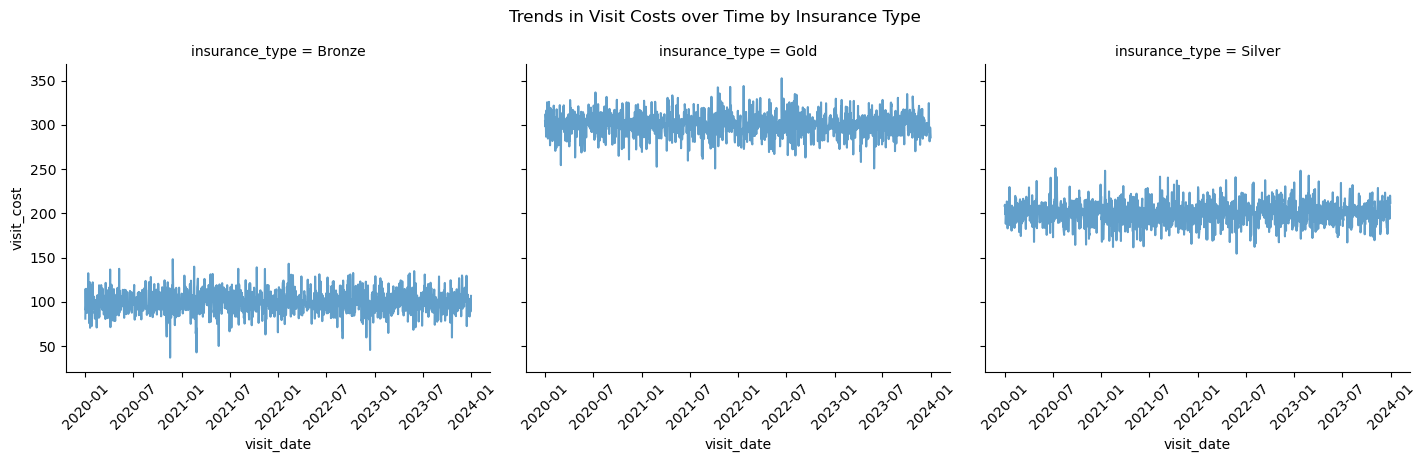

In [32]:
cost_trends = ms_data.groupby(['visit_date', 'insurance_type'])['visit_cost'].mean().reset_index()

plt.figure(figsize=(12, 8))
g = sns.FacetGrid(
    cost_trends, 
    col='insurance_type', 
    height=4, 
    aspect=1.2, 
    col_wrap=3
)
g.map(sns.lineplot, 'visit_date', 'visit_cost', alpha=0.7)

g.fig.suptitle('Trends in Visit Costs over Time by Insurance Type', y=1.05)
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

plt.show()
